## Red Wine Quality Prediction

#### Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

#### Attribute Information

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)
Output variable (based on sensory data) 

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

#### Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('wine quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
# The First Step is to proceed with the Exploratory Data analysis to gain the understanding of the data 
# We will verify whether the fetaures are all numerical values or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Obsevation - From the above data we can conclude that the features are numerical and the output feature is an Discrete variable

In [5]:
# The Next Step is to check for the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation - There are no Null Values in the Dataset

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Summary Statistics

In [7]:
#Since There are no Null Values we will go for the statistical summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Obsevations - 

1. The mean seems to be greater than median in most of the columns
2. There is a big difference between 75th percentile and max of fixed acidity, residual sugar, free SO2, Total SO2
3. The Above observation imply that there are Outliers present in the columns

In [8]:
# Now we will check unique values for o/p feature
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
#Checking value counts for each quality wine and visualising the above data
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

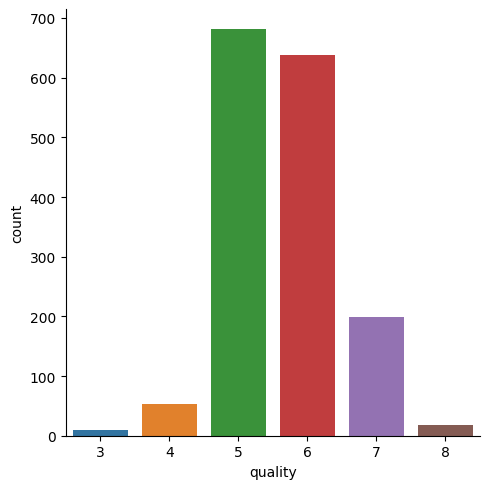

In [10]:
#We will use Catplot for determining the count
sns.catplot(x = 'quality',data = df,kind = 'count')

#### Observations-
1. Maximum number of observations are between 5 and 6
2. Few observations are present for quality(3,4,7,8)

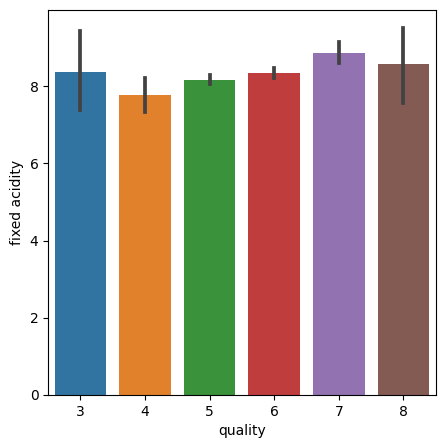

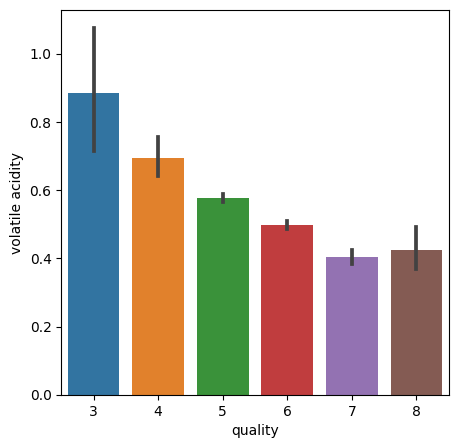

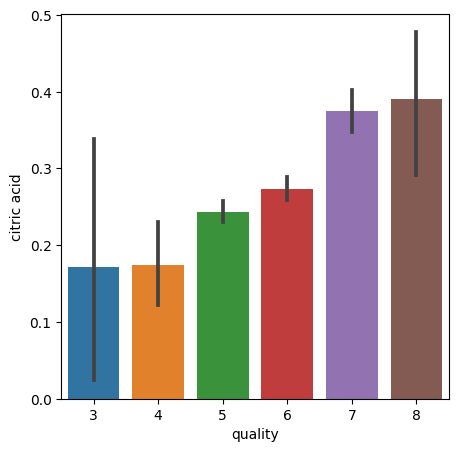

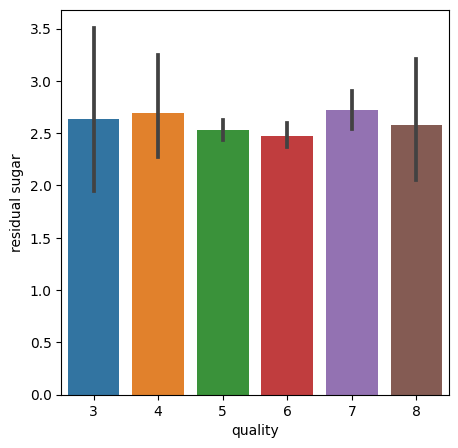

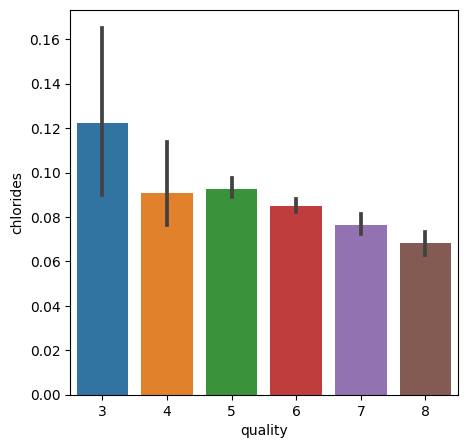

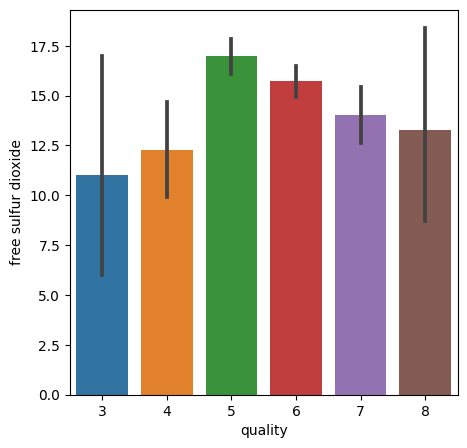

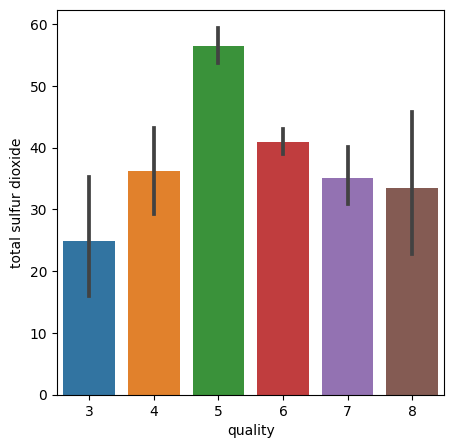

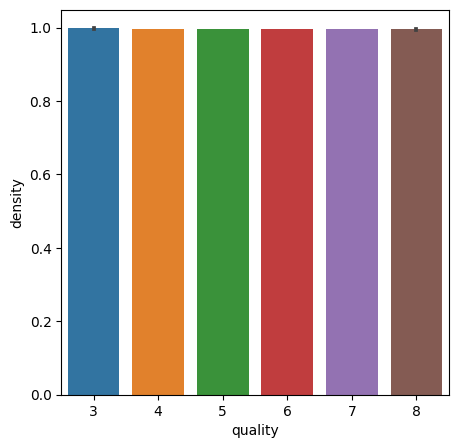

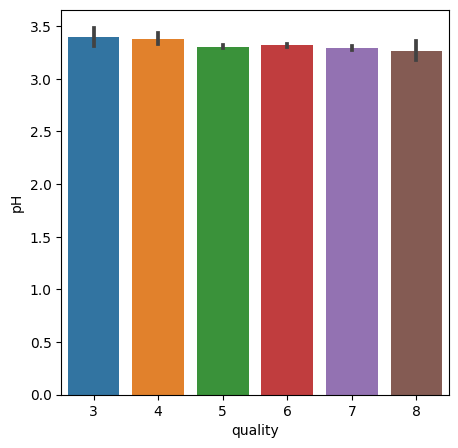

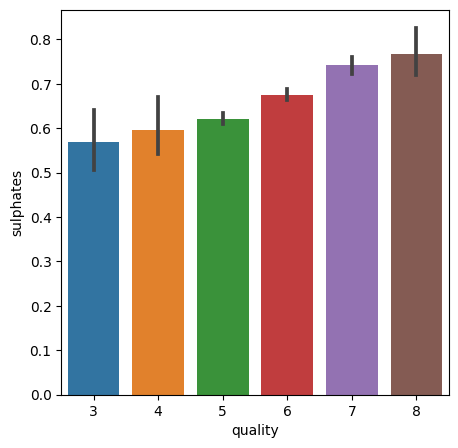

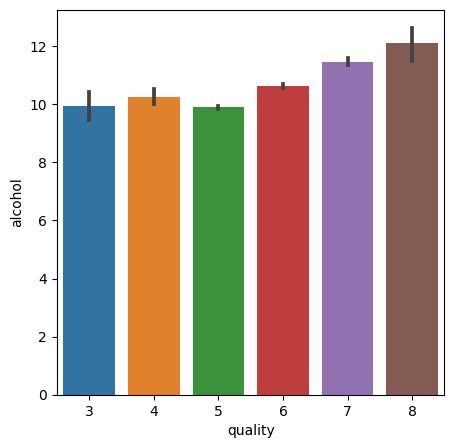

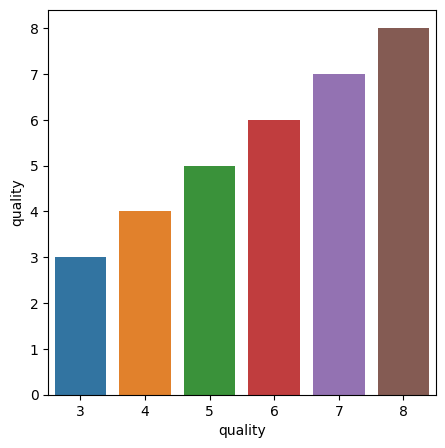

In [11]:
#Now we will check for relation between independent features and Output Features
for i in df.columns:
    plot = plt.figure(figsize=(5,5))
    sns.barplot(x='quality',y = i, data=df)
    plt.show()

#### Checking the Correlation

In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot: >

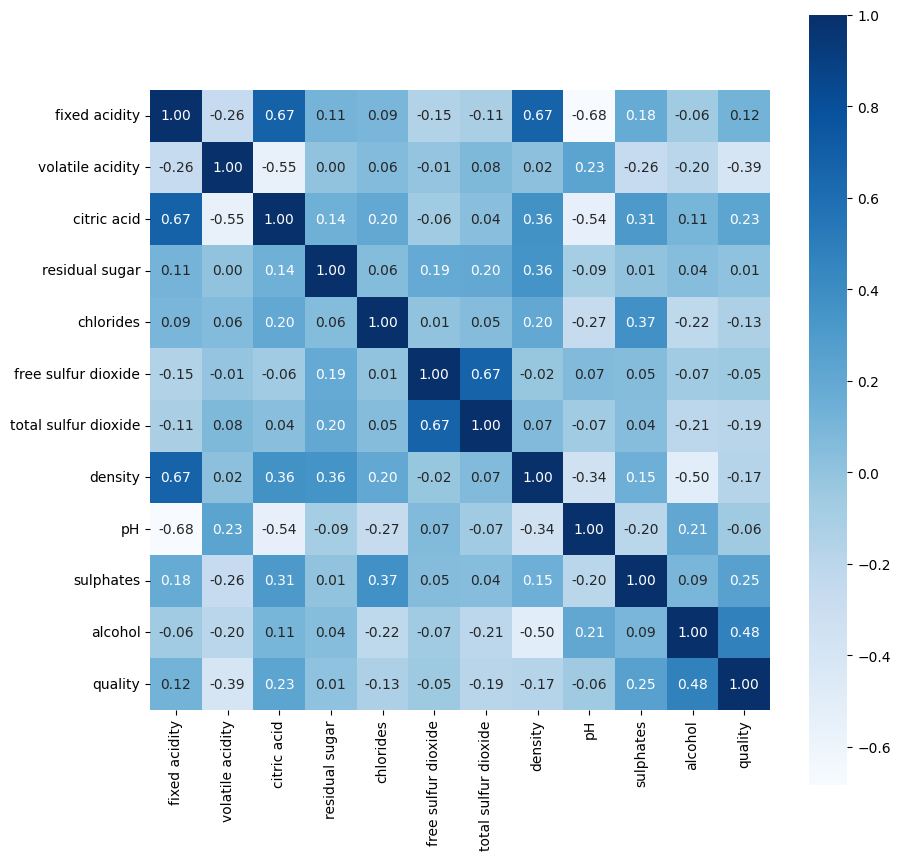

In [13]:
# Using Heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,fmt='.2f',square=True,cmap='Blues',annot=True)

#### Observations-
1. Volatile acidity and Quality of the wine are negatively correlated
2. free SO2 and total SO2 are highly correlated
3. Alcohol is Highly Correlated 
4. residual sugar and Quality are not Correlated

#### Outliers Detection

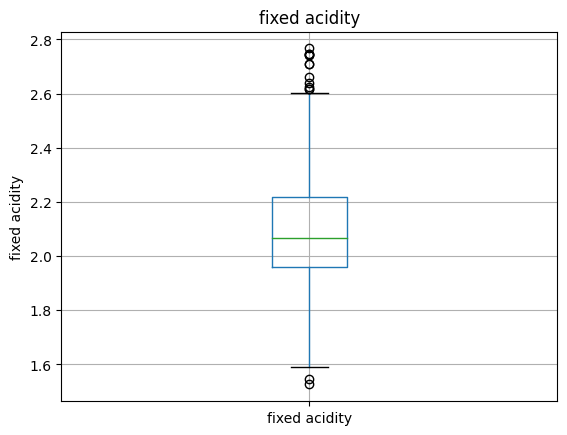

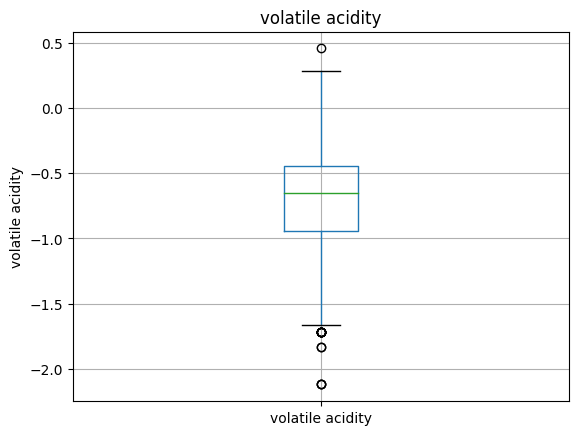

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


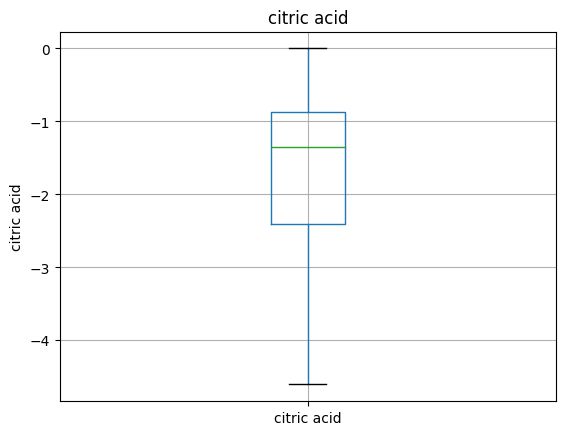

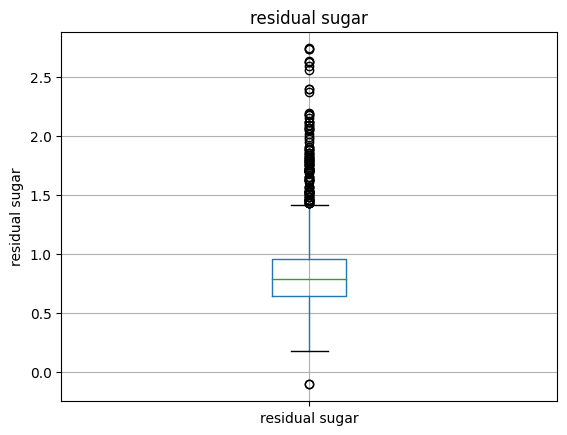

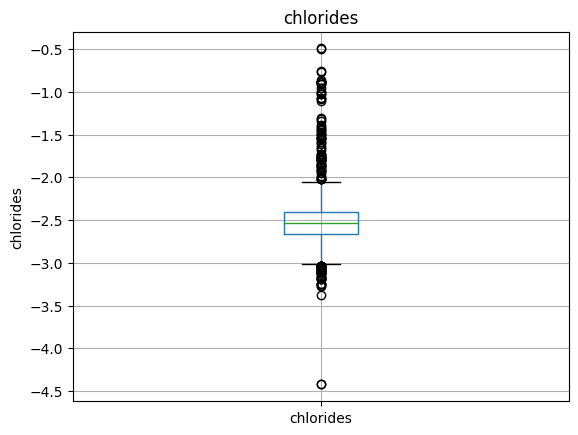

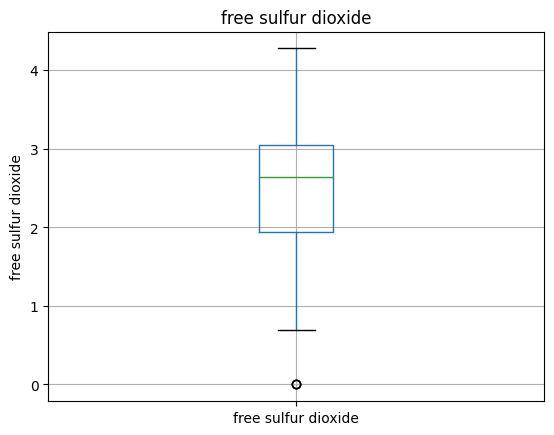

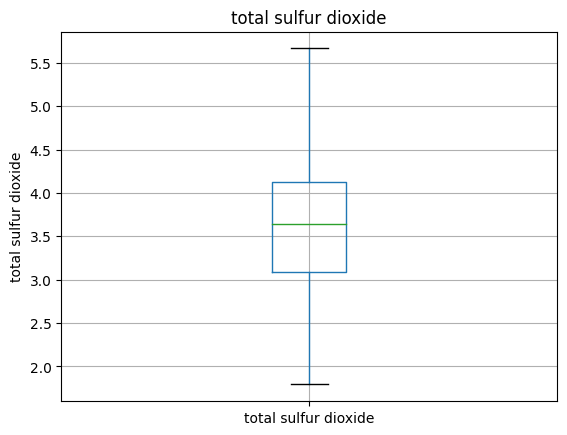

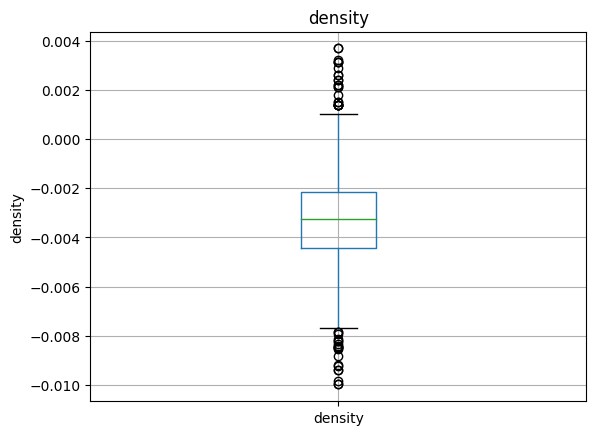

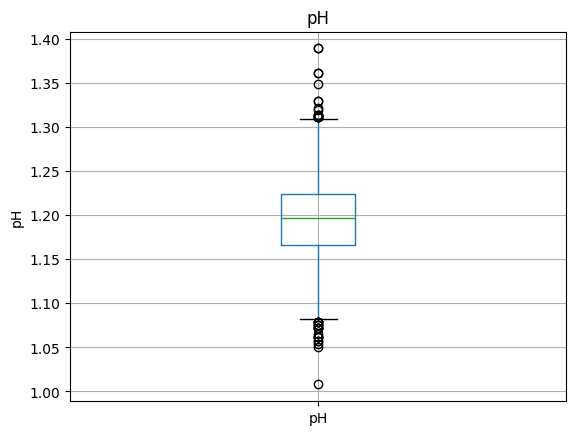

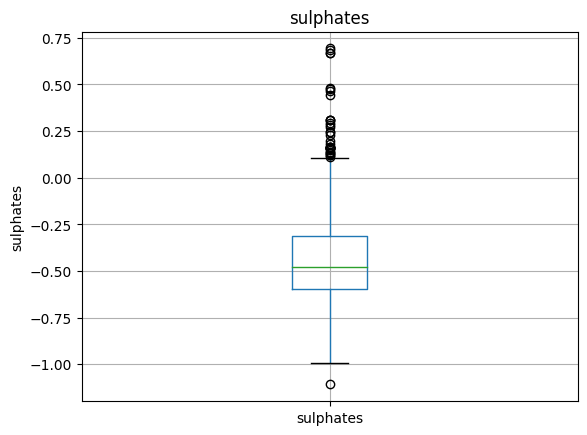

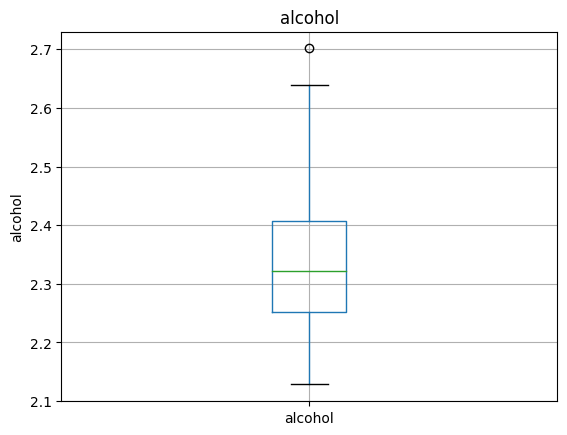

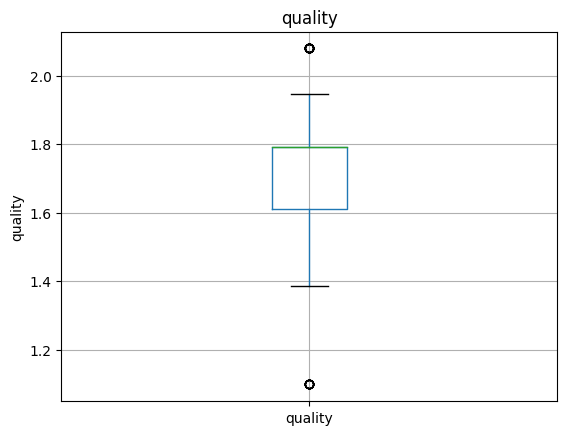

In [14]:
data = df.copy()
for feature in df.columns:

    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    #plt.xlabel(feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Observations:
1. Sulphates,pH,Density,chlorides and resiudal sugar have more Outliers 
2. Fixed Acidity and volatile acidity have less outliers 

#### Skewness

In [15]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### Observations:
1. Residual Sugar, Chlorides are higly skewed
2. Free SO2,SO2 are skewed and sulphates as well

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


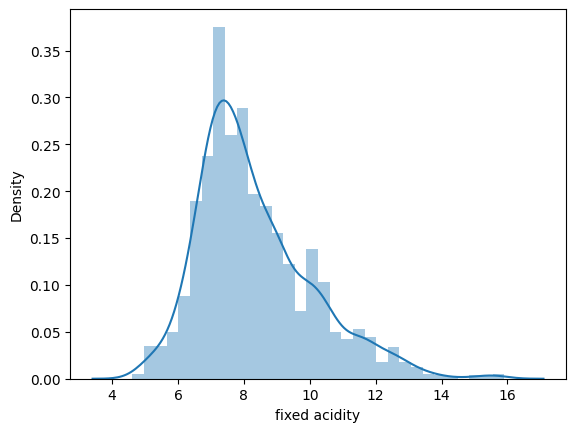

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


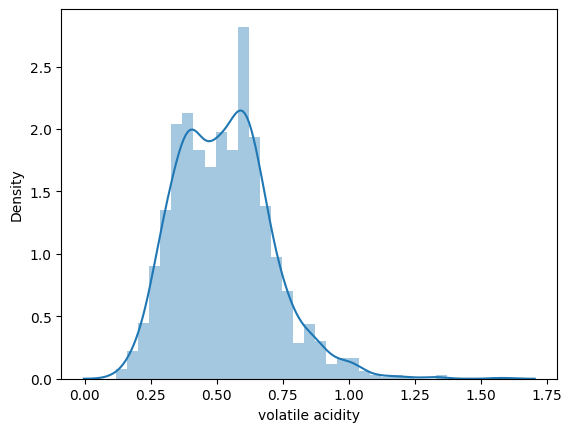

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


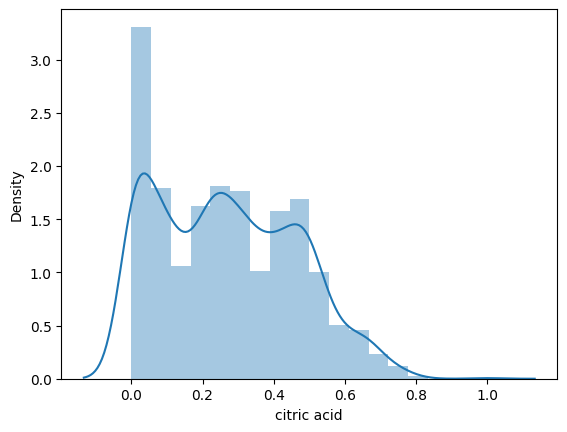

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


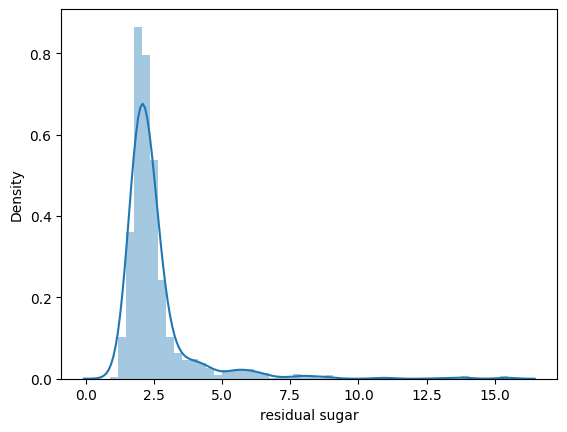

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


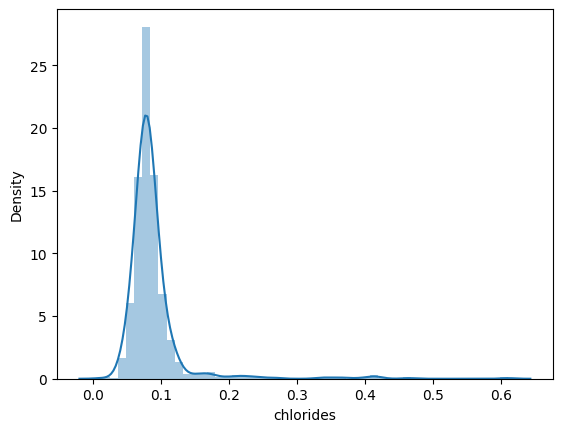

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


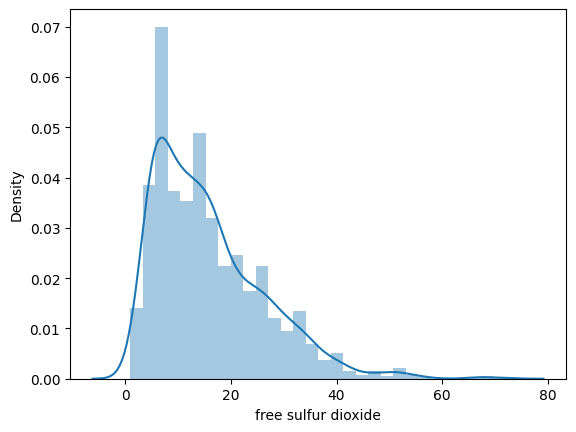

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


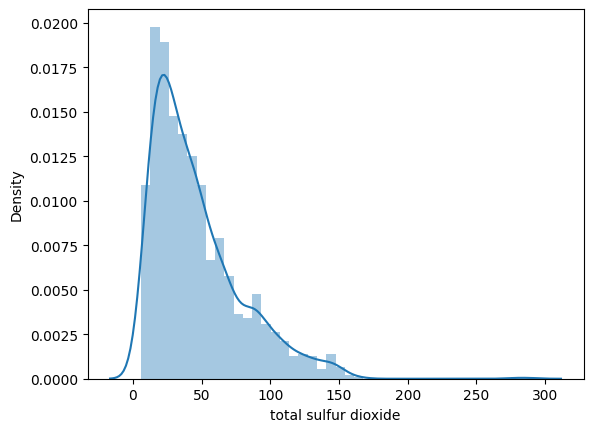

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


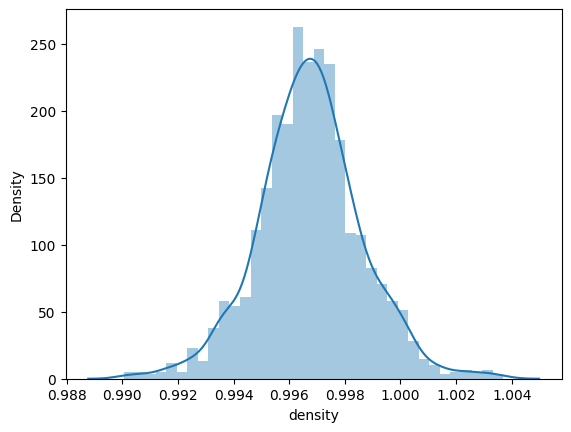

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


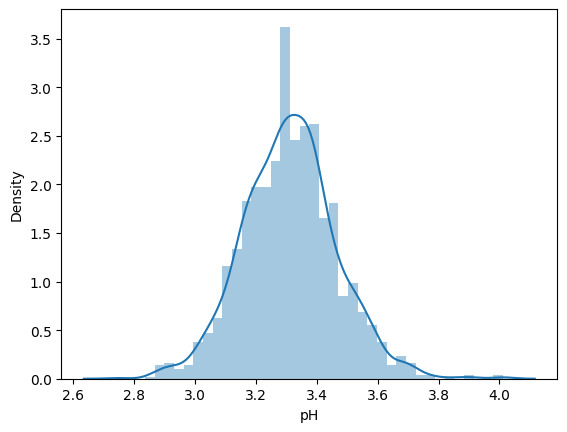

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


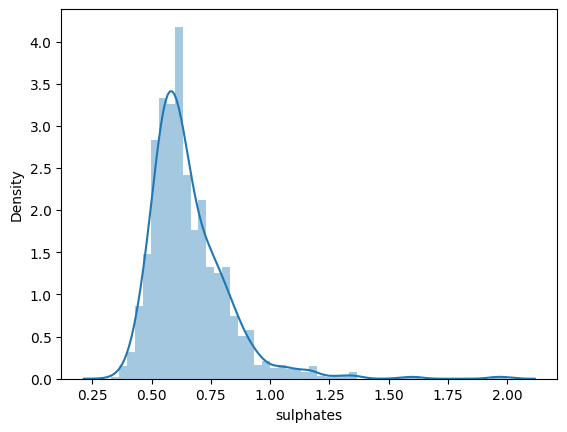

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


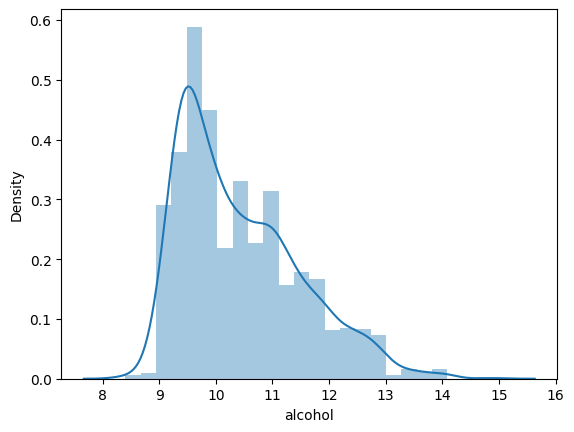

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


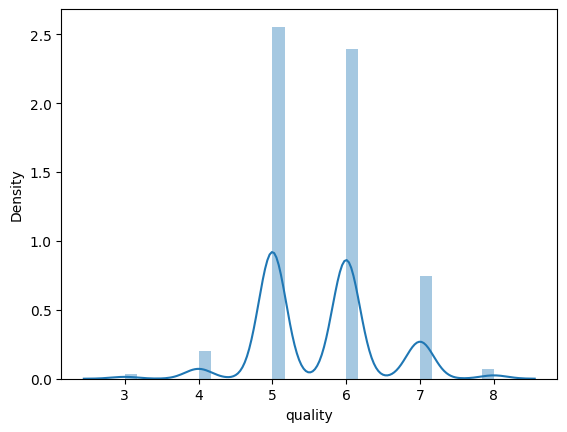

In [16]:
#Visualising the skewed data
for feature in df.columns:
    sns.distplot(df[feature])
    plt.show()

##### We will remove Skewness after checking the Correlation values, Since we cannot transform the features which are highly correlated with the Target Feature

From the above data we will perform Transformation on chlorides

In [17]:
df['chlorides'] = np.log(df['chlorides'])
df['fixed acidity'] = np.log(df['fixed acidity'])

In [18]:
df.skew()

fixed acidity           0.393915
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

#### We will do Binarization of the output feature where the wine quality above 7 is regarded as good

In [19]:
#In the Above Question we are instructed that the data is based on classification problem 
# In the Output Feature we have various classes but to Determine whether the wine is good or bad we first set the threshold
# The threshold is to set on '7' after which the quality of wine is determine to be good

In [20]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']]
df['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

#### Splitting the independent and dependent features

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [23]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

#### Observation - The Dataset is Imbalanced

#### To Balance the imbalanced dataset we will do oversampling of minoroty class using SMOTE technique

In [24]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [25]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

#### Feature Selection

In [26]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
mutual_info=mutual_info_classif(X,y)

In [28]:
mutual_data=pd.Series(mutual_info,index=df.drop('quality',axis = 1).columns)
mutual_data.sort_values(ascending=False)

alcohol                 0.399403
sulphates               0.372026
volatile acidity        0.357505
citric acid             0.353846
pH                      0.330598
fixed acidity           0.328063
residual sugar          0.320686
chlorides               0.318878
total sulfur dioxide    0.275583
free sulfur dioxide     0.266823
density                 0.157121
dtype: float64

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [30]:
print(model.feature_importances_)

[0.06880404 0.10441849 0.09129315 0.05303503 0.06355326 0.05844771
 0.08604986 0.06626985 0.05507562 0.11207815 0.24097484]


<AxesSubplot: >

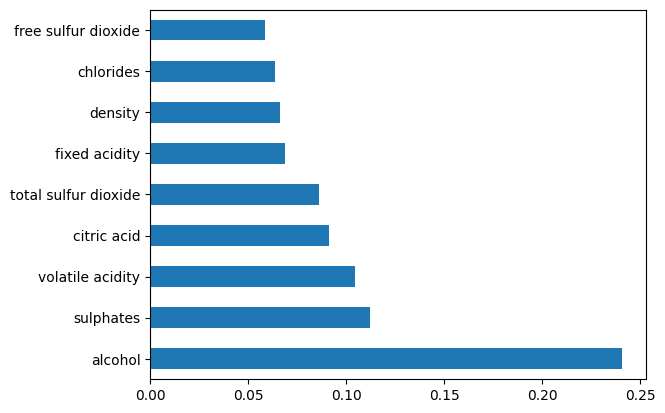

In [31]:
rank_features = pd.Series(model.feature_importances_,index=X.columns)
rank_features.nlargest(9).plot(kind = 'barh')

#### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

#### Feature Scaling

In [33]:
#Now we will proceed to feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Applying PCA

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test =  pca.transform(X_test)

## Model Selection

#### Testing with SVC

In [35]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

In [36]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8752260397830018
[[222  49]
 [ 20 262]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       271
           1       0.84      0.93      0.88       282

    accuracy                           0.88       553
   macro avg       0.88      0.87      0.87       553
weighted avg       0.88      0.88      0.87       553



#### Testing the Model DecisionTReeeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred_test = dtc.predict(X_test)

In [38]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8842676311030742
[[236  35]
 [ 29 253]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       271
           1       0.88      0.90      0.89       282

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.88      0.88      0.88       553



#### Testing the model with RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [40]:
print(accuracy_score(y_test,rf_pred)*100)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

93.67088607594937
[[250  21]
 [ 14 268]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       271
           1       0.93      0.95      0.94       282

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553



#### Cross Validating the Model - Using Kfold

In [41]:
from sklearn.model_selection import KFold
model = RandomForestClassifier()
kfold_validation = KFold(10)

In [42]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('mean: ',np.mean(results))

[0.94584838 0.81227437 0.93501805 0.79422383 0.8442029  0.86231884
 0.98550725 0.96376812 0.9673913  0.97101449]
mean:  0.9081567519489353


#### Since the range of cross val scores are high we will go with Hyper parameter Tuning

#### Since RandomForest Performs the best we will proceed with RandomForest Classifier

##### Starting with Hyperparameter tuning using RadomisedSearchCv

In [43]:
#Randomized Search CV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#No of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

#No of features tp consider at every split
max_features = ['auto','sqrt','log2']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]

#Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7,9]

#Samples required for each leaf node
min_samples_leaf = [1,2,4,6,8]

#Create the random grid

random_grid = {
                'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']            
}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [44]:
rf_model = RandomForestClassifier()
rf_randomCv = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid,n_iter=100, cv=10, verbose=2,
                                random_state=100, n_jobs=-1)
rf_randomCv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\chizz\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [45]:
rf_randomCv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

In [46]:
best_random_grid = rf_randomCv.best_estimator_

In [47]:
y_pred = best_random_grid.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9312839059674503
[[249  22]
 [ 16 266]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       271
           1       0.92      0.94      0.93       282

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



### GRID SEARCH

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': [rf_randomCv.best_params_['criterion']],
    'max_depth': [rf_randomCv.best_params_['max_depth']],
    'max_features': [rf_randomCv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomCv.best_params_['min_samples_leaf'], 
                         rf_randomCv.best_params_['min_samples_leaf']+2, 
                         rf_randomCv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomCv.best_params_['min_samples_split'] + 2,
                          rf_randomCv.best_params_['min_samples_split'] - 1,
                          rf_randomCv.best_params_['min_samples_split'], 
                          rf_randomCv.best_params_['min_samples_split'] +1,
                          rf_randomCv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomCv.best_params_['n_estimators'] - 200, rf_randomCv.best_params_['n_estimators'] - 100, 
                     rf_randomCv.best_params_['n_estimators'],rf_randomCv.best_params_['n_estimators'] +50,
                     rf_randomCv.best_params_['n_estimators'] + 100, rf_randomCv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [780], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [4, 1, 2, 3, 4], 'n_estimators': [-100, 0, 100, 150, 200, 300]}


In [49]:
#Fitting the grid_SearchCV to the data
rf_new = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_new,param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


C:\Users\chizz\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chizz\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chizz\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 341, in fit
    self._validate_params()
  File "C:\Users\chizz\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 570, in _validate_params
    valida

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [780],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [4, 1, 2, 3, 4],
                         'n_estimators': [-100, 0, 100, 150, 200, 300]},
             verbose=2)

In [53]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 780,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [51]:
best_grid = grid_search.best_estimator_

In [52]:
y_pred = best_grid.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Report: ',classification_report(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('f1-score: ',f1_score(y_test,y_pred))

Accuracy:  0.9421338155515371
[[252  19]
 [ 13 269]]
Report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94       271
           1       0.93      0.95      0.94       282

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.94      0.94      0.94       553

Precision Score:  0.9340277777777778
f1-score:  0.943859649122807


### We Were able to obtain 94 percent accuracy after perfroming Hyperparameter Tuning

### Saving and Deployment of the model

In [55]:
import pickle
filename = 'WineQualityPrediction.pkl'
pickle.dump(best_grid,open(filename,'wb'))

#### Conclusion:

In [56]:
a = np.array(y_test)
predicted = np.array(best_grid.predict(X_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [57]:
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
548,1,1
549,1,1
550,1,1
551,1,1
